## Predicting heart disease 

This notebook looks into using various python based machine learning and data science libraries. 

1. Problem definition
2. Data 
3. Evaluation 
4. Features
5. Modelling
6. Experimentation


## Problem Definition 

In a statement, given clinical parameters can we predict a patient has heart disease or not

Attribute Information:

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## We want our plot to appear inside the notebook

%matplotlib inline

# Models from scikit learn 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evalations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape ## (comes in rows and columns)

(303, 14)

## Data exploration 

## The goal here is to find out more about the data and become SME on data you are working on it

1. What questions are you to answer or solve?
2. What kind of data do we have and how do we treat different types?
3. Whats missing and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, and remove features to get more out of your data?

In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

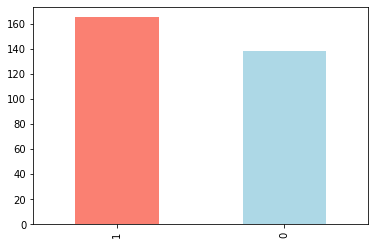

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
## Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Compare between different columns

Heart Disease Frequency according to Sex


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
## Compare target column with Sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
pd.crosstab([df["age"], df["sex"]], df["target"])

target   0  1
age sex      
29  1    0  1
34  0    0  1
    1    0  1
35  0    0  1
    1    2  1
...     .. ..
70  1    3  1
71  0    0  3
74  0    0  1
76  0    0  1
77  1    1  0

[73 rows x 2 columns]

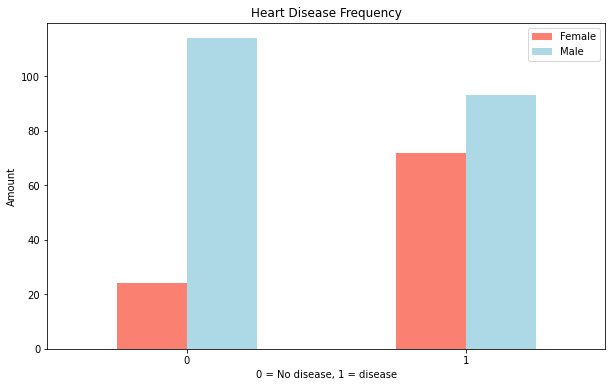

In [13]:
##  Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6),color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency")
plt.xlabel("0 = No disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

<AxesSubplot:xlabel='age,sex'>

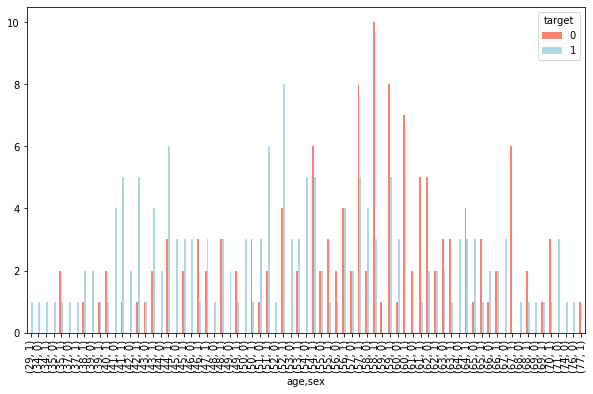

In [14]:
### Testing 
pd.crosstab([df["age"], df["sex"]], df["target"]).plot(kind="bar", figsize=(10,6),color=["salmon", "lightblue","red"])

## Age vs Max Heart Rate for Heart Disease

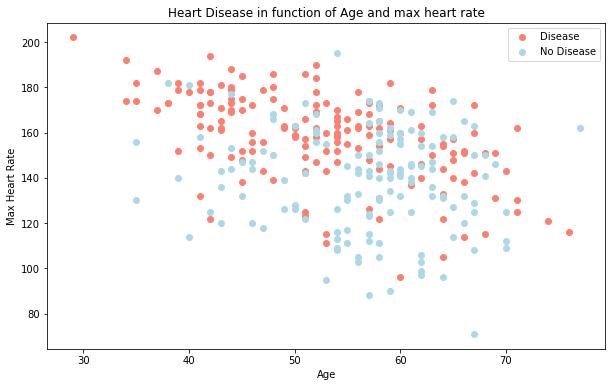

In [15]:
plt.figure(figsize=(10,6))

## Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],
           c="salmon")


## Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue");


## Add some helpful information

plt.title("Heart Disease in function of Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

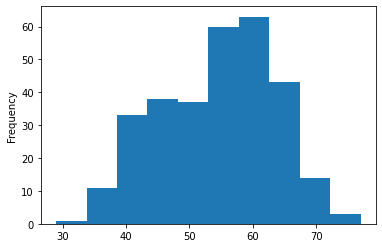

In [16]:
# Check the distribution of the age column with a histogram

df.age.plot.hist();

## Heart Frequency per Chest Pain`

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


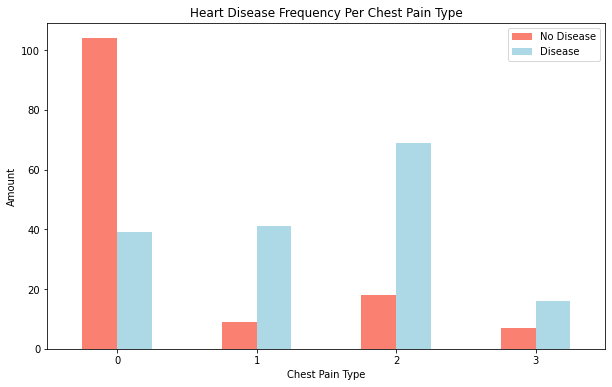

In [18]:
## Make it more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])


## Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


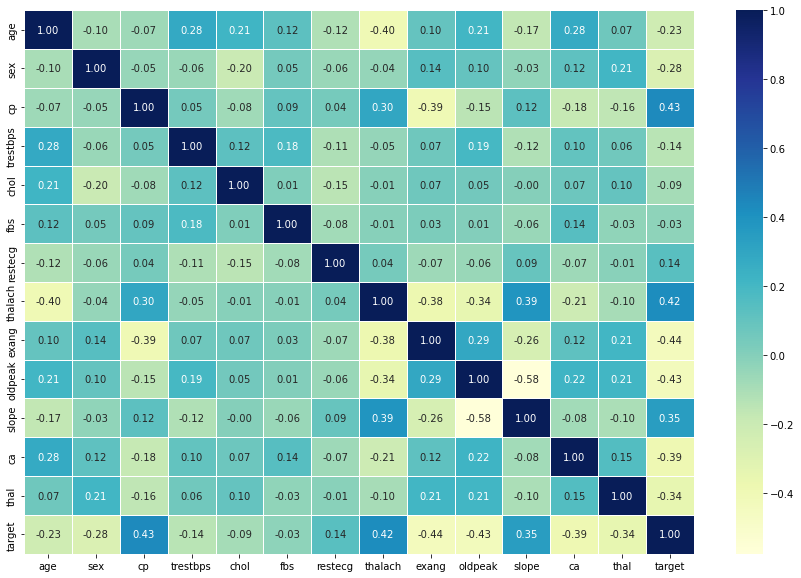

In [21]:
# Make a correlation visualization 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize =(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

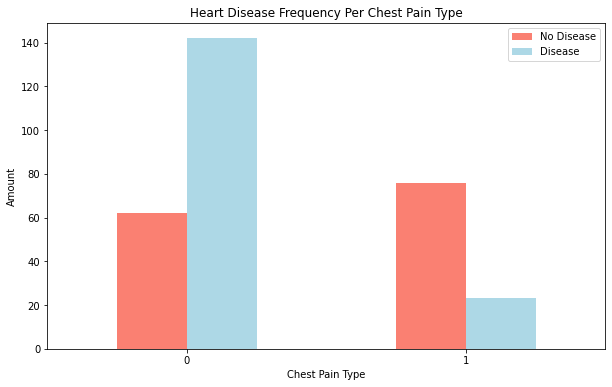

In [22]:
pd.crosstab(df.exang, df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])


## Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Modeling 

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
## Split data into X and y 

X = df.drop("target", axis=1)
y= df["target"]

In [26]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
## Split data into train and test sets

np.random.seed(42)

# Split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
len(X_train.head())

5

## Data is sorted into training and test set and now we build a model 

## So what machine learning model to be used 

## We are going to try three models 
1. Logisitics Regression
2. K-nearest Neighbours classifier
3. Random Forest Classifier 

In [29]:
### Put models in a dictionary 

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}
            
            
## Create a function to fit and score models 

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models : a dict of different scikit machine learning models 
    X_train: training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels   
    
    """
    ## Set up random seed
    np.random.seed(42)
    
    ## Make a dictionary to keep models score
    model_scores = {}
    
    # Loop through the models 
    for name, model in models.items():
        #Fit the model to the data 
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores 
    
    

In [30]:
fit_and_score

<function __main__.fit_and_score(models, X_train, X_test, y_train, y_test)>

In [31]:
models

{'Logistic Regression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier()}

In [32]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

model_scores

/home/irfan/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

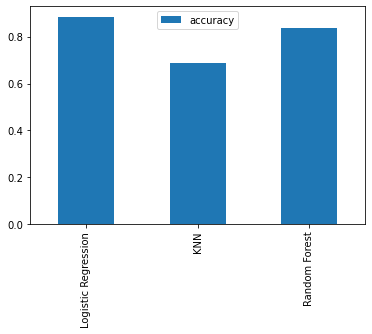

In [33]:
## Model Comparison
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Metrics and feature tuning

# Common steps after baseline model that is applicable for all models 

1. Hyperparameter tuning
2. Feature importance

### Model type specific metrics to tune or modify or observe for performance

## Classification model metrics

1. Confusion matrix
2. Cross-validation
3. Precision 
4. Recall
5. F1 score
6. Classification report
7. ROC curve
8. Area under the curve (AUC)

## Hyper parameters tuning (Model KNN) 

In [34]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbours 

neighbors = range(1,21)

# Set up KNN instance

knn = KNeighborsClassifier()

# Loop through different n_neighbours

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # update the training scores list 
    train_scores.append(knn.score(X_train, y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

ValueError: Format specifier missing precision

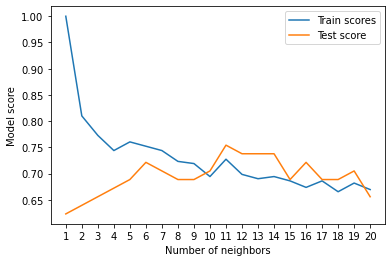

In [37]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:2.f}%" )

### Hyper parameter tuning with Randomiziedsearchcv

We are going to tune:
1. LogisticRegression
2. RandomForestClassfier

Using RandomizedCV


In [38]:
# Create a hyperparameter grid for logisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create hyperparameter for grid for Randomforestclassifier

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [39]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [40]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [41]:
# Tune logisticregression

np.random.seed(42)

# Set up random hyperparameter search for logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


# Fit random hyperparameter search model for logisticregression

rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
# Check best paramaters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [44]:
# Now we have tuned logistic regression lets do the same for Randomforestclassifier

In [45]:
# Set up random seed
np.random.seed(42)

# Set up random hyperparameter search for Randomforestclassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid, 
                          cv=5,
                          n_iter=50,
                          verbose=True)

# FIt the random hyperparamater search model for RandomForestclassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
# Find the best hyperparameters

rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [53]:
### Evaluate the randomized search RandomForest classifier
rs_rf.score(X_test, y_test)

0.8688524590163934

In [54]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridsearchCV

In [49]:
## Sinced our logisticregression model provides best possible result so we will improve them again using Gridsearccv

In [50]:
# Different Hyperparameters for LogisticRegression model

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search Logisticregression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the grid hyperparameter search model

gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [51]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Feature Importance


Feature importance is anohter as asking, "which features contributed most to the outcomes of the model and did they contribute?"

Finding features importance is different for each machine learning model.

Lets find the feature importance for our logisticregression model

In [56]:
## Fit an instance of logisticregression 

gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [57]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [58]:
# Match coefs of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [59]:
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

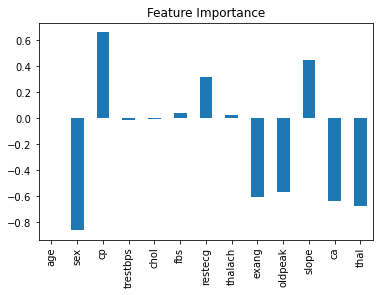

In [60]:
## Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [61]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [63]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Evaluating our tuned machine learning classifier, beyond accuracy 

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall 
* f1 score


To make comparisons and evaluate our trained model, and first we need to make predictions

In [64]:
y_preds = gs_log_reg.predict(X_test)

In [65]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

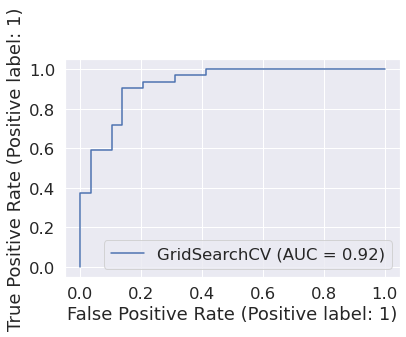

In [75]:
## ROC 

# Plot ROC curve and calculate AUC Metric

plot_roc_curve(gs_log_reg, X_test, y_test);

In [67]:
## Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


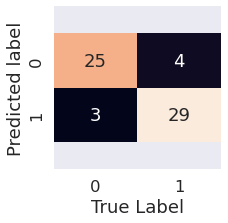

In [71]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    """
    Plots a nice looking  confusion matrix using Seaborns heartmap()
    
    """
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - .5)

plot_conf_mat(y_test, y_preds)
    

In [72]:
## Now we have got AUC, ROC, and confusion matrix and now lets get classification and cross validated precision, recall, and f1 report



In [73]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We are going to calculate precision, recall, and f1-score of our model using cross-validation and to do so we will be using cross_val_score()


In [74]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best params

clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [77]:
## Cross validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

cv_acc



array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [78]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [80]:
## Cross validated precision

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
cv

In [81]:
# Cross validated recall

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [82]:
# Cross validated f1

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

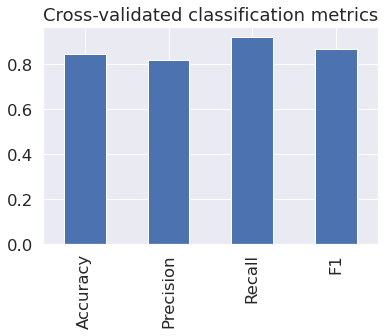

In [85]:
## Visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)
